In [44]:
import gzip
import os
import sys
import struct
import numpy as np
def read_image(fi):
    magic, n, rows, columns = struct.unpack(">IIII", fi.read(16))
    assert magic == 0x00000803
    assert rows == 28
    assert columns == 28
    rawbuffer = fi.read()
    assert len(rawbuffer) == n * rows * columns
    rawdata = np.frombuffer(rawbuffer, dtype='>u1', count=n*rows*columns)
    return rawdata.reshape(n, rows, columns).astype(np.float32) / 255.0

def read_label(fi):
    magic, n = struct.unpack(">II", fi.read(8))
    assert magic == 0x00000801
    rawbuffer = fi.read()
    assert len(rawbuffer) == n
    return np.frombuffer(rawbuffer, dtype='>u1', count=n)

if __name__ == '__main__':
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
    os.system('wget -N http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

    np.savez_compressed(
        'mnist',
        train_x=read_image(gzip.open('train-images-idx3-ubyte.gz', 'rb')),
        train_y=read_label(gzip.open('train-labels-idx1-ubyte.gz', 'rb')),
        test_x=read_image(gzip.open('t10k-images-idx3-ubyte.gz', 'rb')),
        test_y=read_label(gzip.open('t10k-labels-idx1-ubyte.gz', 'rb'))
    )


--2022-05-08 23:10:33--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-images-idx3-ubyte.gz’ not modified on server. Omitting download.

--2022-05-08 23:10:33--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘train-labels-idx1-ubyte.gz’ not modified on server. Omitting download.

--2022-05-08 23:10:33--  http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connec

In [46]:
import gzip
import os
import sys
import struct
import numpy as np

In [47]:
data = np.load('mnist.npz')
X_train = data['train_x']
y_train = data['train_y']
X_test = data['test_x']
y_test = data['test_y']


In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
from matplotlib import pyplot as plt
def print_image(img) :
    plt.imshow(img)
    plt.show()

In [50]:
i =3
print(X_train[i][:,12])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.3137255  0.99215686 0.9843137  0.9843137
 0.9843137  0.9843137  0.99215686 0.54901963 0.         0.
 0.         0.         0.         0.        ]


In [51]:
import PIL.Image as pilimg
def load_background() :
    backgrounds = []
    file_list = os.listdir('./background')
    for file in file_list :
        output = pilimg.open('./background/{}'.format(file))
        output = np.array(output).sum(axis = 2)
        output = 1-(output - output.min()) / (output.max() - output.min())
        backgrounds.append(output)
    return backgrounds

In [52]:
def make_rgb(img, figures) :
    rgbs = []
    for figure in figures :
        rgb = np.zeros((28, 28, 3))
        for i in range(3) :
            a, b, c, d = np.random.uniform(low=0, high=255, size=4)
            n = np.where(img != 0, img*(max(a, b) - min(a, b)) + min(a, b), 0) # single channel MNIST Image
            f = figure*(max(c, d) - min(c, d)) + min(c, d) # single channel background
            output = np.where(n+f == f, n+f, n) # 겹치지 않으면 MNIST + background, 겹치면 MNIST
            rgb[:,: , i] += output
        rgbs.append((rgb.astype(np.uint8)))
    return rgbs

In [53]:
figures = load_background()

/tmp/ipykernel_4297/3194917784.py:8: RuntimeWarning: invalid value encountered in true_divide
  output = 1-(output - output.min()) / (output.max() - output.min())


In [54]:
X_train_augments = []
for img in X_train :
    X_train_augments += make_rgb(img, figures)
X_train_augments = np.array(X_train_augments)

KeyboardInterrupt: 

In [ ]:
X_train_augments.shape

(360000, 28, 28, 3)

In [11]:
y_train_augments = []
for y in y_train :
    y_train_augments += [y]*6
y_train_augments = np.array(y_train_augments)


In [12]:
print(X_train_augments.shape)
print(y_train_augments.shape)

(360000, 28, 28, 3)
(360000,)


In [13]:
y_train_augments[0:20]

array([5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 1, 1],
      dtype=uint8)

[172  40  86]


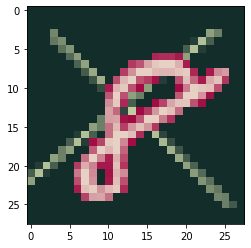

[182 134  10]


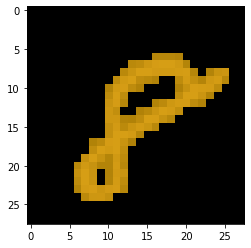

[ 23 111  59]


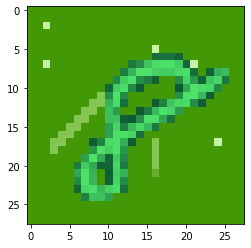

[ 52 173 164]


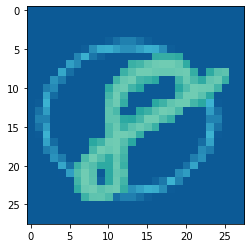

[ 11 122 223]


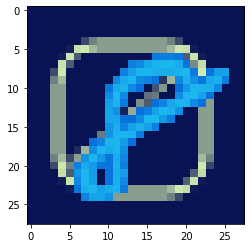

[26 94 28]


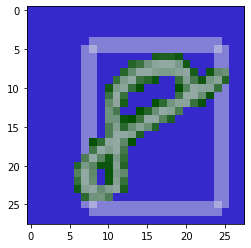

In [14]:
rgbs = make_rgb(img, figures)
for rgb in rgbs :
    print(rgb[12,12,:])
    print_image(rgb)
    


In [15]:
print(X_train_augments.shape)
print(y_train_augments.shape)



(360000, 28, 28, 3)
(360000,)


In [30]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

# random example images
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
# e.g. Sometimes(0.5, GaussianBlur(0.3)) would blur roughly every second image.
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.

seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        # iaa.Fliplr(0.5), # horizontally flip 50% of all images
        # iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        # sometimes(iaa.CropAndPad(
        #     percent=(-0.01, 0.05),
        #     pad_mode=ia.ALL,
        #     pad_cval=(0, 255)
        # )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-14, 14), # rotate by -45 to +45 degrees
            shear=(-4, 4), # shear by -16 to +16 degrees
            # order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            # cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            # mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
                # sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 0.2)), # blur images with a sigma between 0 and 3.0
                    # iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    # iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
                # iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                # iaa.Emboss(alpha=(0, 1.0), strength=(0, 1.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
                iaa.SimplexNoiseAlpha(iaa.OneOf([
                    # iaa.EdgeDetect(alpha=(0.5, 1.0)),
                    # iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
                ])),
                iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.001*255), per_channel=0.5), # add gaussian noise to images
                iaa.OneOf([
                    # iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
                    # iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
                ]),
                # iaa.Invert(0.05, per_channel=True), # invert color channels
                iaa.Add((-2, 2), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                # iaa.AddToHueAndSaturation((-10, 10)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
                # iaa.OneOf([
                #     iaa.Multiply((0.8, 1.2), per_channel=0.5),
                #     iaa.FrequencyNoiseAlpha(
                #         exponent=(-2, 0),
                #         first=iaa.Multiply((0.8, 1.2), per_channel=True),
                #         second=iaa.LinearContrast((0.5, 2.0))
                #     )
                # ]),
                # iaa.LinearContrast((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
                # sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                # sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                # sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)
images_aug = seq(images=X_train_augments)


/home/krex/anaconda3/envs/krex/lib/python3.9/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `SimplexNoiseAlpha()` is deprecated. Use `BlendAlphaSimplexNoise` instead. SimplexNoiseAlpha is deprecated. Use BlendAlphaSimplexNoise instead. The order of parameters is the same. Parameter 'first' was renamed to 'foreground'. Parameter 'second' was renamed to 'background'.
  warn_deprecated(msg, stacklevel=3)


In [31]:
images_aug.shape

(360000, 28, 28, 3)

In [32]:
X_train =np.array(images_aug)
y_train = np.array(y_train_augments)


In [33]:
print(X_train.shape)
print(y_train.shape)

(360000, 28, 28, 3)
(360000,)


In [37]:
np.random.seed(0)
np.random.shuffle(X_train)
np.random.seed(0)
np.random.shuffle(y_train)

In [38]:
X_train = X_train[:-15000,:,:,:]
y_train = y_train[:-15000]

X_test = X_train[-15000::,:,:,:]
y_test = y_train[-15000:]

In [56]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
class ImageDataset(Dataset):
    """ Image shape: 28x28x3 """

    def __init__(self, root_dir, fmt=':06d', extension='.png'):
        self.root_dir = root_dir
        self.fmtstr = '{' + fmt + '}' + extension

    def __len__(self):
        return len(os.listdir(self.root_dir))

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.fmtstr.format(idx)
        img_path = os.path.join(self.root_dir, img_name)
        img = plt.imread(img_path)
        data = torch.from_numpy(img)
        return data
    
    
from torch.utils.data import Dataset, DataLoader
import os
class ImageDataset(Dataset):
    """ Image shape: 28x28x3 """

    def __init__(self, root_dir, fmt=':06d', extension='.png'):
        self.root_dir = root_dir
        self.fmtstr = '{' + fmt + '}' + extension

    def __len__(self):
        return len(os.listdir(self.root_dir))

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.fmtstr.format(idx)
        img_path = os.path.join(self.root_dir, img_name)
        img = plt.imread(img_path)
        data = torch.from_numpy(img)
        return data
    
    
test_data = ImageDataset('./test_img/')
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

In [59]:
true = [7,2,1,0,4,1,4,9,5,9,0,6,9,0,1,5,9,7,3,4,9,6,6,5,4,0,7,4]

In [66]:
a = []
for x in test_loader:
  a.append(np.array(x.reshape(28,28,3)))
  
test_datas = np.array(a)
print(test_datas.shape)

(28, 28, 28, 3)


In [70]:
figures = load_background()

/tmp/ipykernel_4297/3194917784.py:8: RuntimeWarning: invalid value encountered in true_divide
  output = 1-(output - output.min()) / (output.max() - output.min())


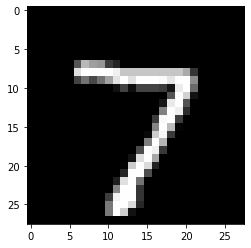

7


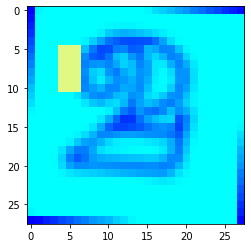

2


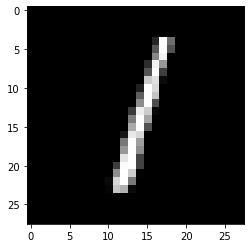

1


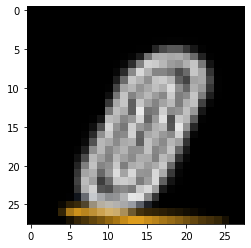

0


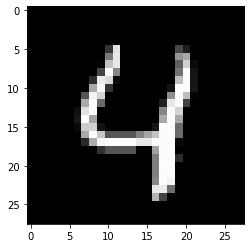

4


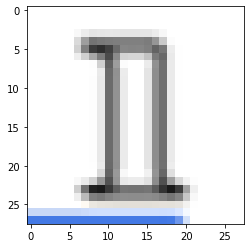

1


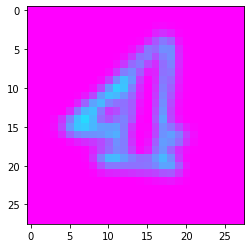

4


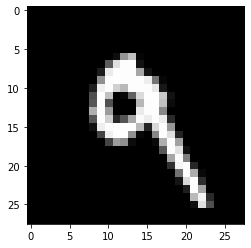

9


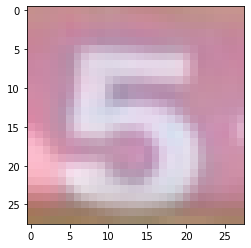

5


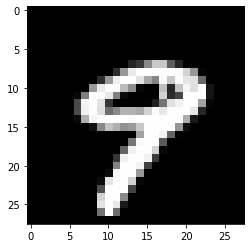

9


In [67]:
for i in range(0,10):
  print_image(test_datas[i])
  print(true[i])


In [68]:
# for i in range(200,210):
#   print_image(X_train[i])
#   print(y_train[i])


In [41]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

345000
345000
15000
15000


In [42]:
np.save('./datas/X_train', X_train)
np.save('./datas/y_train', y_train)
np.save('./datas/X_test', X_test)
np.save('./datas/y_test', y_test)